# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [40]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [41]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [42]:
#  1. Get the total rides for each city type [using groupby() and apply the count() method to the ride_id column]
total_rides = pyber_data_df.groupby(['type']).count()["ride_id"]

total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [43]:
# 2. Get the total drivers for each city type [using groupby() to create a series of data 
# that has the type of city as the index, then apply the sum() method to the driver_count colummn]

total_drivers = city_data_df.groupby(['type']).sum()["driver_count"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [44]:
#  3. Get the total amount of fares for each city type [use the groupby() fx to create a series of data 
#that has the type of city as the index, then apply the sum() method to the fare column]

total_fares = pyber_data_df.groupby(['type']).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [45]:
#  4. Get the average fare per ride for each city type. [by dividing the sum of all the fares by the total rides]

average_fare = total_fares / total_rides

average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [46]:
# 5. Get the average fare per driver for each city type. [by dividing the sum of all the fares by the total drivers]

average_driver_fare = total_fares / total_drivers

average_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [47]:
#  6. Create a PyBer summary DataFrame. [make sure matches example on challenge instructions]

type_summary_df = pd.DataFrame ({
    "Total Riders" : total_rides, 
    "Total Drivers" : total_drivers, 
    "Total Fares" : total_fares, 
    "Average Fare per Ride" : average_fare, 
    "Average Fare per Driver" : average_driver_fare})
                    
type_summary_df


,Total Riders,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [48]:
#  7. Cleaning up the DataFrame. Delete the index name [remove the index "type" from the PyBer summary Data Frame]
type_summary_df.index.name = None

type_summary_df

,Total Riders,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [49]:
#  8. Format the columns. [apply formatting $ to columns]

type_summary_df['Total Riders'] = type_summary_df['Total Riders'].map('{:,}'.format)
    
type_summary_df['Total Drivers'] = type_summary_df['Total Drivers'].map('{:,}'.format)

type_summary_df['Total Fares'] = type_summary_df['Total Fares'].map('${:,.2f}'.format)
    
type_summary_df['Average Fare per Ride'] = type_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)

type_summary_df['Average Fare per Driver'] = type_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

type_summary_df

,Total Riders,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [50]:
# 1. Read the merged DataFrame [using groupby() fx on the "type" and "date" columns of the pyber_data_df, 
#then apply the sum() method on the "fare" column to show the total fare amount for each date.]
#create a multiple-line graph that shows the total fares for each week by city type]

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [51]:
#change the date to datetime data type (required in order to use the resample() method in step 8)

pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])

In [52]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares [use the pivot() fx to convert the dataframe 
#from the previous step so that the index 
#is the "date" each, each column is a city "type" and the values are the "fare"]
#  for each date where the indices are the city type and date.

total_fare_per_day = pyber_data_df.groupby(['type','date']).sum()['fare']
total_fare_per_day

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [53]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
# use the pivot() fx to convert the data frame

total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [54]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fare_per_day_pivot = total_fare_per_day.pivot(index='date', columns='type', values='fare')
total_fare_per_day_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [55]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#use the provided code snippet
january_april_fare_per_day = total_fare_per_day_pivot.loc['2019-01-01':'2019-04-29']
                                                          
january_april_fare_per_day                                                          

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [56]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

january_april_fare_per_day.index = pd.to_datetime(january_april_fare_per_day.index)    

In [57]:
# 7. Check that the datatype for the index is datetime using df.info()

january_april_fare_per_day.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [58]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
january_april_fare_per_week = january_april_fare_per_day.resample("W").sum()
january_april_fare_per_week    

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


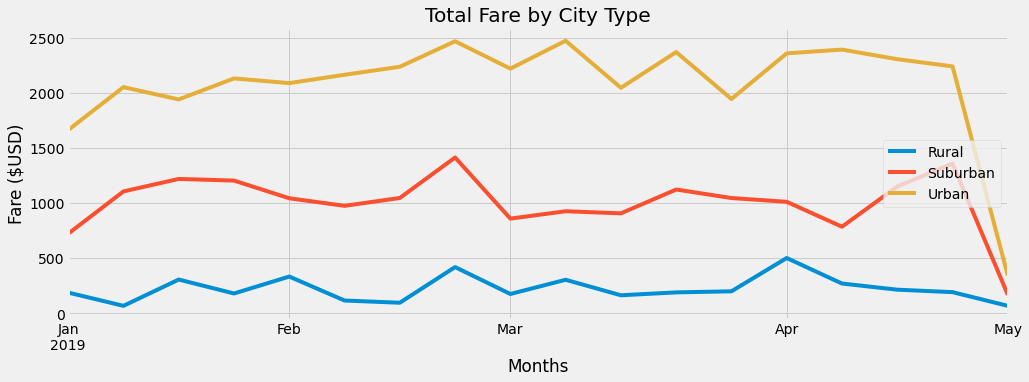

In [72]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
january_april_fare_per_week.plot(figsize = (15,5))


# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Get only the month to show in the x-axis:
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")
plt.xlim("2019-01-01", "2019-04-29")

plt.legend(["Rural","Suburban","Urban"])
plt.legend(loc='right')

# Save the figure.
plt.savefig("Resources/PyBer_fare_summary.png")